In [1]:
import os
os.environ['KAGGLE_USERNAME'] = "syahrizsenowaliz" 
os.environ['KAGGLE_KEY'] = "f9689a1dbd5c47fab7081aff67023d47" 
!kaggle competitions download -c dogs-vs-cats 

  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 37.1MB/s]
 99% 539M/543M [00:09<00:00, 36.0MB/s]
100% 543M/543M [00:09<00:00, 60.0MB/s]
 95% 257M/271M [00:04<00:00, 68.9MB/s]
100% 271M/271M [00:04<00:00, 64.0MB/s]


In [2]:
# Upload data
from zipfile import ZipFile

file_name = "/content/train.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [3]:
data_dir_list = os.listdir('/content/train')
#print(data_dir_list)

path, dirs, files = next(os.walk("/content/train"))
file_count = len(files)
print(file_count)

original_dataset_dir = '/content/train'
base_dir = '/content/cats_and_dogs_small'
os.mkdir(base_dir)

25000


In [4]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

In [5]:
import shutil
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    #print(src,dst)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1250)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1250)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [6]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.242.jpg', 'cat.373.jpg', 'cat.434.jpg', 'cat.685.jpg', 'cat.26.jpg', 'cat.179.jpg', 'cat.630.jpg', 'cat.92.jpg', 'cat.474.jpg', 'cat.372.jpg']
['dog.250.jpg', 'dog.904.jpg', 'dog.206.jpg', 'dog.363.jpg', 'dog.630.jpg', 'dog.518.jpg', 'dog.755.jpg', 'dog.310.jpg', 'dog.295.jpg', 'dog.591.jpg']


In [7]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 250
total validation dog images: 250


In [8]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows = 4
ncols = 4

pic_index = 0 

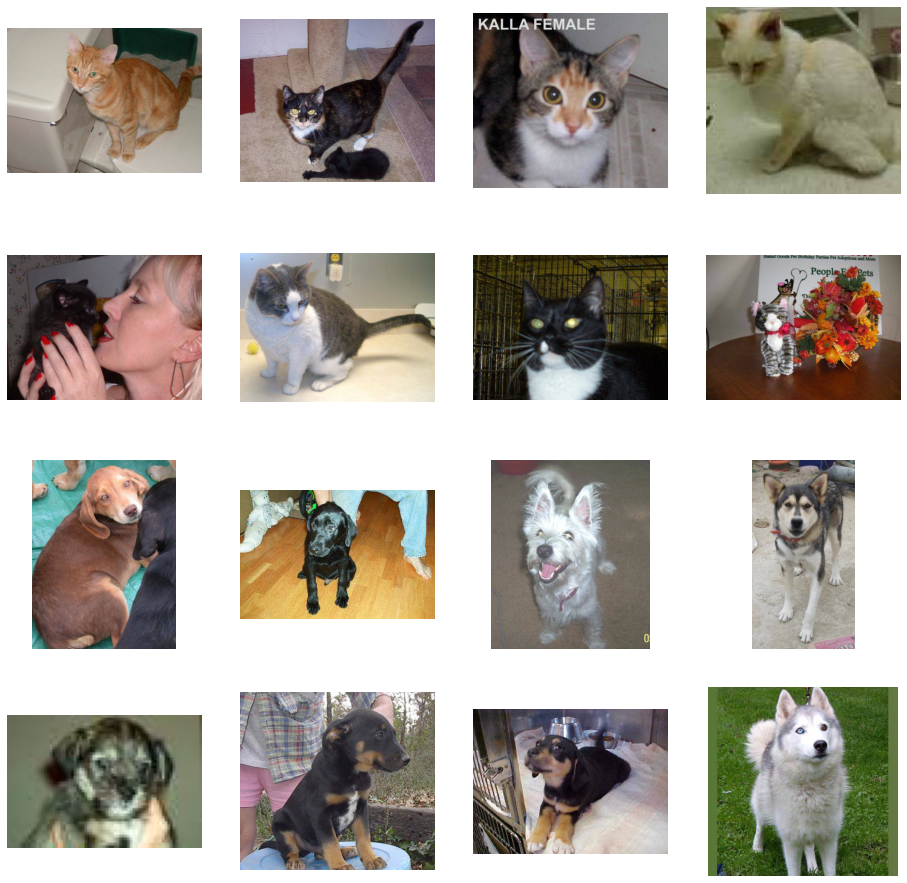

In [9]:
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[ pic_index-8:pic_index] 
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):

  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [56]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Conv2D, MaxPooling2D, Flatten, Dropout, Dense 
model = tf.keras.models.Sequential([                                  
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),  
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dropout((0.4)),
    tf.keras.layers.Dense(1, activation='sigmoid') 
])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 15, 15, 128)      

In [57]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.002),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [58]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator( rescale = 1.0/255.,rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=32,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     

validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=32,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [59]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.80 and logs.get('val_accuracy')> 0.80):
      print("\nAccuracy and Validation Accuracy > 80%, Training Stop!")
      self.model.stop_training = True

callbacks = myCallback()

In [61]:
history = model.fit(
          train_generator,
          steps_per_epoch = 60,
          epochs = 90,
          validation_data = validation_generator,
          validation_steps = 10,
          verbose = 2,
          callbacks=[callbacks])

Epoch 1/90
60/60 - 16s - loss: 0.4881 - accuracy: 0.7763 - val_loss: 0.4224 - val_accuracy: 0.8094
Epoch 2/90
60/60 - 16s - loss: 0.4695 - accuracy: 0.7778 - val_loss: 0.4485 - val_accuracy: 0.7812
Epoch 3/90
60/60 - 16s - loss: 0.4911 - accuracy: 0.7920 - val_loss: 0.6152 - val_accuracy: 0.7937
Epoch 4/90
60/60 - 16s - loss: 0.4717 - accuracy: 0.7836 - val_loss: 0.3834 - val_accuracy: 0.8313
Epoch 5/90
60/60 - 16s - loss: 0.4767 - accuracy: 0.7946 - val_loss: 0.4102 - val_accuracy: 0.8250
Epoch 6/90
60/60 - 16s - loss: 0.4829 - accuracy: 0.7915 - val_loss: 0.8865 - val_accuracy: 0.7344
Epoch 7/90
60/60 - 16s - loss: 0.4584 - accuracy: 0.7815 - val_loss: 0.5027 - val_accuracy: 0.8125
Epoch 8/90
60/60 - 16s - loss: 0.4855 - accuracy: 0.7841 - val_loss: 0.4273 - val_accuracy: 0.8031
Epoch 9/90
60/60 - 16s - loss: 0.4829 - accuracy: 0.7894 - val_loss: 0.3853 - val_accuracy: 0.8406
Epoch 10/90
60/60 - 16s - loss: 0.4401 - accuracy: 0.8051 - val_loss: 0.4838 - val_accuracy: 0.7719
Epoch 11/

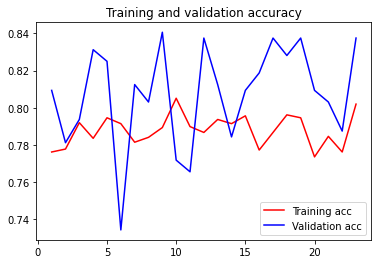

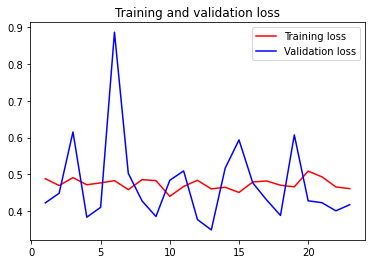

In [62]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

Saving dogs_00071.jpg to dogs_00071.jpg
[1.]
dogs_00071.jpg is a dog


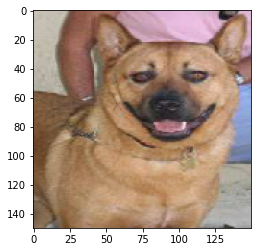

In [63]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  imgplot = plt.imshow(img)

  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0:
    print(fn + " is a dog")
    
  else:
    print(fn + " is a cat")

In [64]:
# Konversi model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmpetb2etdx/assets


INFO:tensorflow:Assets written to: /tmp/tmpetb2etdx/assets


In [65]:
with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [66]:
model.save('cats_and_dogs_small_2.h5')